In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [2]:
#定义变量 
thermal_power_station_strategy=np.zeros(shape=(4,1000)) 
wind_power_station_strategy=np.zeros(shape=(1,1000))
c_wind_speed= np.loadtxt("./data/c_wind_speed_uniform_distribution_(3,25).txt")      
kappa_wind_speed= np.loadtxt("./data/kappa_wind_speed_uniform_distribution_(2,3).txt")  
d_power_demand=np.loadtxt("./data/d_power_demand_normal_distribution_(70,5).txt") #时变的需求侧平均用电需求
#d_power_demand[0]=0
'''for i in range(0,1000):
    d_power_demand[i]=70
for i in range(0,1000):
    c_wind_speed[i]=c_wind_speed[0]
for i in range(0,1000):
    kappa_wind_speed[i]=kappa_wind_speed[0]'''
thermal_power_station_dual_variable=np.zeros(shape=(4,1000))
wind_power_station_dual_variable=np.zeros(shape=(1,1000))
#E=np.loadtxt("6_Network_Topology_Double_Random_Adjacency_Matrix.txt")
E=np.zeros(shape=(5,5))
thermal_power_station_cost=np.zeros(shape=(1,1000)) #火力发电成本
wind_power_station_cost=np.zeros(shape=(1,1000)) #风力发电成本
sum_cost=np.zeros(shape=(1,1000)) #总发电成本
thermal_power_station_eta=[0.0675,0.0675,0.0925,0.0625]
#thermal_power_station_eta=[0.0375,0.0375,0.0625,0.035]
thermal_power_station_zeta=[2,1.75,1,3]
thermal_power_station_xi=[0,0,0,0]
thermal_power_station_P_min=[50,20,15,10]
thermal_power_station_P_max=[200,120,80,100]
wind_power_station_varphi=[1]
wind_power_station_v_in=[3]
wind_power_station_v_out=[25]
wind_power_station_v_r=[13]
wind_power_station_sigma_ue=[5]
wind_power_station_sigma_oe=[30]
wind_power_station_P_r=[160]
wind_power_station_P_min=[0]
wind_power_station_P_max=[160]
sum_thermal_wind_power_station_strategy=np.zeros(shape=(1,1000))
step_size_primal=1
step_size_dual=1
for i in range(0,5):
    for j in range(0,5):
        E[i][j]=1/5       
regularization_parameter=0.001

In [3]:
#火力，风力发电策略初始化
thermal_power_station_strategy[0][0]=0
thermal_power_station_strategy[1][0]=0
thermal_power_station_strategy[2][0]=0
thermal_power_station_strategy[3][0]=0
wind_power_station_strategy[0][0]=0
#火力，风力发电对偶初始化
thermal_power_station_dual_variable[0][0]=0
thermal_power_station_dual_variable[1][0]=0
thermal_power_station_dual_variable[2][0]=0
thermal_power_station_dual_variable[3][0]=0
wind_power_station_dual_variable[0][0]=0
#初始总发电策略
sum_thermal_wind_power_station_strategy[0][0]=0
#初始总发电成本
#火力发电成本
for i in range(0,4):
    thermal_power_station_cost[0][0]=thermal_power_station_cost[0][0]+thermal_power_station_eta[i]*thermal_power_station_strategy[i][0]*thermal_power_station_strategy[i][0]+thermal_power_station_zeta[i]*thermal_power_station_strategy[i][0]+thermal_power_station_xi[i]
#风力发电成本
for i in range(0,1):
    wind_power_station_cost[0][0]=wind_power_station_cost[0][0]+wind_power_station_varphi[i]*wind_power_station_strategy[i][0]+wind_power_station_sigma_ue[i]*((wind_power_station_P_r[i]-wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*c_wind_speed[0]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[0],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))*sc.gamma(1+1/kappa_wind_speed[0])-sc.gammaincc(1+1/kappa_wind_speed[0],math.pow(wind_power_station_v_r[i]/c_wind_speed[0],kappa_wind_speed[0]))*sc.gamma(1+1/kappa_wind_speed[0])))+wind_power_station_sigma_oe[i]*((wind_power_station_strategy[i][0])*(1-math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))+math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][0])*(math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0]))))+(wind_power_station_P_r[i]*c_wind_speed[0]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[0],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][0])/wind_power_station_P_r[i],kappa_wind_speed[0]))/(math.pow(c_wind_speed[0],kappa_wind_speed[0])))*sc.gamma(1+1/kappa_wind_speed[0])-sc.gammaincc(1+1/kappa_wind_speed[0],math.pow(wind_power_station_v_in[i]/c_wind_speed[0],kappa_wind_speed[0]))*sc.gamma(1+1/kappa_wind_speed[0])))
#发电总成本
sum_cost[0][0]=thermal_power_station_cost[0][0]+wind_power_station_cost[0][0]

In [4]:
def attack_free_decentralized_economic_dispatch(thermal_power_station_strategy,wind_power_station_strategy,c_wind_speed,kappa_wind_speed,d_power_demand,thermal_power_station_dual_variable,wind_power_station_dual_variable,E,thermal_power_station_cost,wind_power_station_cost,thermal_power_station_eta,thermal_power_station_zeta,thermal_power_station_P_min,thermal_power_station_P_max,wind_power_station_varphi,wind_power_station_sigma_ue,wind_power_station_sigma_oe,wind_power_station_P_min,wind_power_station_P_max,sum_thermal_wind_power_station_strategy,step_size_primal,step_size_dual):
    #显示初始化的数据
    #输出初始状态的原变量和对偶变量
    print("***************************attack_free_online_decentralized_economic_dispatch*****************************")
    print("相关变量初始值为：")
    for i in range (0,4):
        print("第",(i+1),"个火力发电站的初始计划发电量为:",thermal_power_station_strategy[i][0])
    for i in range (0,1):
        print("第",(i+5),"个风力发电站的初始计划发电量为:",wind_power_station_strategy[i][0])
    print("****************************************************************************")
    for i in range (0,4):
        print("第",(i+1),"个火力发电站的初始对偶变量为:",thermal_power_station_dual_variable[i][0])
    for i in range (0,1):
        print("第",(i+5),"个风力发电站的初始对偶变量为:",wind_power_station_dual_variable[i][0])
    print("****************************************************************************")
    print("初始总发电量:",sum_thermal_wind_power_station_strategy[0][0])
    print("*************************")
    print("需求侧平均用电需求:",d_power_demand[0])
    print("****************************************************************************")
    print("风速分布参数c:",c_wind_speed[0])
    print("****************************************************************************")
    print("风速分布参数kappa:",kappa_wind_speed[0])
    print("****************************************************************************")
    print("总发电成本：", sum_cost[0][0])
    print("****************************************************************************")
    print("原变量迭代步长为:",step_size_primal)
    print("*****************************************************************************")
    print("对偶变量迭代步长为:",step_size_dual)
    print("*****************************************************************************")
    
    #开始迭代
    for k in range(1,1000):
        #发电站更新计划发电量和对偶变量
        #对偶变量 先做梯度上升 再做聚合
        #梯度上升
        dual_variable_intermediate=[] #存放当前迭代中6个用户对对偶变量做完梯度下降后得到的中间值
        for i in range(0,4):
            dual_variable_intermediate.append(thermal_power_station_dual_variable[i][k-1]+step_size_dual*((1/6)*thermal_power_station_strategy[i][k-1]-(1/6)*d_power_demand[k-1]-regularization_parameter*thermal_power_station_dual_variable[i][k-1]))
        for j in range(0,1):
            dual_variable_intermediate.append(wind_power_station_dual_variable[j][k-1]+step_size_dual*((1/6)*wind_power_station_strategy[j][k-1]-(1/6)*d_power_demand[k-1]-regularization_parameter*wind_power_station_dual_variable[j][k-1]))
        #聚合 火力发电站的对偶更新
        for i in range(0,4):
            weight_aggregation_dual_variable=0
            for j in range(0,4):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i][j]*dual_variable_intermediate[j]               
            for j in range(0,1):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i][j+4]*dual_variable_intermediate[j+4]
            thermal_power_station_dual_variable[i][k]=weight_aggregation_dual_variable
        #聚合 风力发电站的对偶更新
        for i in range(0,1):
            weight_aggregation_dual_variable=0
            for j in range(0,4):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i+4][j]*dual_variable_intermediate[j]               
            for j in range(0,1):
                weight_aggregation_dual_variable=weight_aggregation_dual_variable+E[i+4][j+4]*dual_variable_intermediate[j+4]
            wind_power_station_dual_variable[i][k]=weight_aggregation_dual_variable             
        #火力发电站计划发电量
        for i in range(0,4):
            thermal_power_station_strategy[i][k]=thermal_power_station_strategy[i][k-1]-step_size_primal*(2*thermal_power_station_eta[i]*thermal_power_station_strategy[i][k-1]+thermal_power_station_zeta[i]+(1/6)*thermal_power_station_dual_variable[i][k-1]) 
            if thermal_power_station_strategy[i][k]<=thermal_power_station_P_min[i]:
                thermal_power_station_strategy[i][k]=thermal_power_station_P_min[i]
            elif thermal_power_station_strategy[i][k]>=thermal_power_station_P_max[i]:
                thermal_power_station_strategy[i][k]=thermal_power_station_P_max[i]
        #风力发电站计划发电量
        for i in range(0,1):
            wind_power_station_strategy[i][k]=wind_power_station_strategy[i][k-1]-step_size_primal*(wind_power_station_varphi[i]+wind_power_station_sigma_oe[i]+(wind_power_station_sigma_ue[i]+wind_power_station_sigma_oe[i])*math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k-1]))/(math.pow(c_wind_speed[k-1],kappa_wind_speed[k-1])))+(-wind_power_station_sigma_ue[i]-wind_power_station_sigma_oe[i])*math.exp(-(math.pow((wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k-1])/wind_power_station_P_r[i]),kappa_wind_speed[k-1]))/(math.pow(c_wind_speed[k-1],kappa_wind_speed[k-1])))+(1/6)*wind_power_station_dual_variable[i][k-1])
            if wind_power_station_strategy[i][k]<=wind_power_station_P_min[i]:
                wind_power_station_strategy[i][k]=wind_power_station_P_min[i]
            elif wind_power_station_strategy[i][k]>=wind_power_station_P_max[i]:
                wind_power_station_strategy[i][k]=wind_power_station_P_max[i]
        
        #计算总计划发电
        #火力发电量
        for i in range(0,4):
            sum_thermal_wind_power_station_strategy[0][k]=sum_thermal_wind_power_station_strategy[0][k]+thermal_power_station_strategy[i][k]
        #风力发电量
        for i in range(0,1):
            sum_thermal_wind_power_station_strategy[0][k]=sum_thermal_wind_power_station_strategy[0][k]+wind_power_station_strategy[i][k]
        
        #计算总发电成本
        #火力发电成本
        for i in range(0,4):
            thermal_power_station_cost[0][k]=thermal_power_station_cost[0][k]+thermal_power_station_eta[i]*thermal_power_station_strategy[i][k]*thermal_power_station_strategy[i][k]+thermal_power_station_zeta[i]*thermal_power_station_strategy[i][k]+thermal_power_station_xi[i]
        #风力发电成本
        for i in range(0,1):
            wind_power_station_cost[0][k]=wind_power_station_cost[0][k]+wind_power_station_varphi[i]*wind_power_station_strategy[i][k]+wind_power_station_sigma_ue[i]*((wind_power_station_P_r[i]-wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*c_wind_speed[k]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[k],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))*sc.gamma(1+1/kappa_wind_speed[k])-sc.gammaincc(1+1/kappa_wind_speed[k],math.pow(wind_power_station_v_r[i]/c_wind_speed[k],kappa_wind_speed[k]))*sc.gamma(1+1/kappa_wind_speed[k])))+wind_power_station_sigma_oe[i]*((wind_power_station_strategy[i][k])*(1-math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))+math.exp(-(math.pow(wind_power_station_v_out[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*wind_power_station_v_in[i]/(wind_power_station_v_r[i]-wind_power_station_v_in[i])+wind_power_station_strategy[i][k])*(math.exp(-(math.pow(wind_power_station_v_in[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))-math.exp(-(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k]))))+(wind_power_station_P_r[i]*c_wind_speed[k]/(wind_power_station_v_r[i]-wind_power_station_v_in[i]))*(sc.gammaincc(1+1/kappa_wind_speed[k],(math.pow(wind_power_station_v_in[i]+((wind_power_station_v_r[i]-wind_power_station_v_in[i])*wind_power_station_strategy[i][k])/wind_power_station_P_r[i],kappa_wind_speed[k]))/(math.pow(c_wind_speed[k],kappa_wind_speed[k])))*sc.gamma(1+1/kappa_wind_speed[k])-sc.gammaincc(1+1/kappa_wind_speed[k],math.pow(wind_power_station_v_in[i]/c_wind_speed[k],kappa_wind_speed[k]))*sc.gamma(1+1/kappa_wind_speed[k])))
        #发电总成本
        sum_cost[0][k]=thermal_power_station_cost[0][k]+wind_power_station_cost[0][k]
        
        #输出第k次迭代中的结果 每间隔10次迭代输出一次结果
        #if (k+1)%10==0:
        print(k,"次迭代中的结果：")
        for i in range (0,4):
            print("第",(i+1),"个火力发电站的计划发电量为:",thermal_power_station_strategy[i][k])
        for i in range (0,1):
            print("第",(i+5),"个风力发电站的计划发电量为:",wind_power_station_strategy[i][k])
        print("****************************************************************************")
        for i in range (0,4):
            print("第",(i+1),"个火力发电站的对偶变量为:",thermal_power_station_dual_variable[i][k])
        for i in range (0,1):
            print("第",(i+5),"个风力发电站的对偶变量为:",wind_power_station_dual_variable[i][k])
        print("****************************************************************************")
        print("总发电量:",sum_thermal_wind_power_station_strategy[0][k])
        print("*************************")
        print("需求侧平均用电需求:",d_power_demand[k])
        print("****************************************************************************")
        print("风速分布参数c:",c_wind_speed[k])
        print("****************************************************************************")
        print("风速分布参数kappa:",kappa_wind_speed[k])
        print("****************************************************************************")        
        print("总发电成本：", sum_cost[0][k])
        print("****************************************************************************")
        print("原变量迭代步长为:",step_size_primal)
        print("****************************************************************************")
        print("对偶变量迭代步长为:",step_size_dual)
        print("****************************************************************************")

    print(datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
    return None  

In [5]:
attack_free_decentralized_economic_dispatch(thermal_power_station_strategy,wind_power_station_strategy,c_wind_speed,kappa_wind_speed,d_power_demand,thermal_power_station_dual_variable,wind_power_station_dual_variable,E,thermal_power_station_cost,wind_power_station_cost,thermal_power_station_eta,thermal_power_station_zeta,thermal_power_station_P_min,thermal_power_station_P_max,wind_power_station_varphi,wind_power_station_sigma_ue,wind_power_station_sigma_oe,wind_power_station_P_min,wind_power_station_P_max,sum_thermal_wind_power_station_strategy,step_size_primal,step_size_dual)

***************************attack_free_online_decentralized_economic_dispatch*****************************
相关变量初始值为：
第 1 个火力发电站的初始计划发电量为: 0.0
第 2 个火力发电站的初始计划发电量为: 0.0
第 3 个火力发电站的初始计划发电量为: 0.0
第 4 个火力发电站的初始计划发电量为: 0.0
第 5 个风力发电站的初始计划发电量为: 0.0
****************************************************************************
第 1 个火力发电站的初始对偶变量为: 0.0
第 2 个火力发电站的初始对偶变量为: 0.0
第 3 个火力发电站的初始对偶变量为: 0.0
第 4 个火力发电站的初始对偶变量为: 0.0
第 5 个风力发电站的初始对偶变量为: 0.0
****************************************************************************
初始总发电量: 0.0
*************************
需求侧平均用电需求: 72.62781256
****************************************************************************
风速分布参数c: 8.301041
****************************************************************************
风速分布参数kappa: 2.66836324
****************************************************************************
总发电成本： 350.846530663705
****************************************************************************
原变量迭代步长为: 1
*************************************

风速分布参数kappa: 2.84390111
****************************************************************************
总发电成本： 3648.587607085574
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
30 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 84.13574195330165
第 2 个火力发电站的计划发电量为: 85.15687975364978
第 3 个火力发电站的计划发电量为: 66.33901361490925
第 4 个火力发电站的计划发电量为: 81.49059534069498
第 5 个风力发电站的计划发电量为: 79.22629326005702
****************************************************************************
第 1 个火力发电站的对偶变量为: -73.7473836158339
第 2 个火力发电站的对偶变量为: -73.7473836158339
第 3 个火力发电站的对偶变量为: -73.7473836158339
第 4 个火力发电站的对偶变量为: -73.7473836158339
第 5 个风力发电站的对偶变量为: -73.7473836158339
****************************************************************************
总发电量: 396.3485239226127
*************************
需求侧平均用电需求: 67.43684589
**************

****************************************************************************
风速分布参数c: 12.16619144
****************************************************************************
风速分布参数kappa: 2.37153232
****************************************************************************
总发电成本： 2130.9196538905107
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
54 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 67.13972207710222
第 2 个火力发电站的计划发电量为: 68.96599760431596
第 3 个火力发电站的计划发电量为: 54.57696668182941
第 4 个火力发电站的计划发电量为: 64.52457686335329
第 5 个风力发电站的计划发电量为: 56.16723634638556
****************************************************************************
第 1 个火力发电站的对偶变量为: -71.62848006704493
第 2 个火力发电站的对偶变量为: -71.62848006704493
第 3 个火力发电站的对偶变量为: -71.62848006704493
第 4 个火力发电站的对偶变量为: -71.62848006704493
第 5 个风力发电站的对偶变量为: -7

原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
79 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 62.09889777525485
第 2 个火力发电站的计划发电量为: 63.95006848014715
第 3 个火力发电站的计划发电量为: 49.420448788864206
第 4 个火力发电站的计划发电量为: 59.555208588878045
第 5 个风力发电站的计划发电量为: 93.15668398059363
****************************************************************************
第 1 个火力发电站的对偶变量为: -60.12370361145012
第 2 个火力发电站的对偶变量为: -60.12370361145012
第 3 个火力发电站的对偶变量为: -60.12370361145012
第 4 个火力发电站的对偶变量为: -60.12370361145012
第 5 个风力发电站的对偶变量为: -60.12370361145012
****************************************************************************
总发电量: 328.1813076137379
*************************
需求侧平均用电需求: 76.48308204
****************************************************************************
风速分布参数c: 4.61547643
****************************************************************************
风速分布参数kappa: 2.57086229
************

总发电量: 375.433490025273
*************************
需求侧平均用电需求: 62.4052612
****************************************************************************
风速分布参数c: 21.32398338
****************************************************************************
风速分布参数kappa: 2.47870416
****************************************************************************
总发电成本： 3004.178708745256
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
105 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 71.69380416279186
第 2 个火力发电站的计划发电量为: 73.54564032331876
第 3 个火力发电站的计划发电量为: 57.47297507334072
第 4 个火力发电站的计划发电量为: 69.43432947086737
第 5 个风力发电站的计划发电量为: 103.20808859300624
****************************************************************************
第 1 个火力发电站的对偶变量为: -63.98054783229747
第 2 个火力发电站的对偶变量为: -63.98054783229747
第 3 个火力发电站的对偶变量为: -63.

第 3 个火力发电站的对偶变量为: -76.07708869888657
第 4 个火力发电站的对偶变量为: -76.07708869888657
第 5 个风力发电站的对偶变量为: -76.07708869888657
****************************************************************************
总发电量: 373.3853209623601
*************************
需求侧平均用电需求: 73.7827364
****************************************************************************
风速分布参数c: 10.89818884
****************************************************************************
风速分布参数kappa: 2.88402584
****************************************************************************
总发电成本： 2698.3479595958056
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
128 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 76.62340667832773
第 2 个火力发电站的计划发电量为: 78.47525797167069
第 3 个火力发电站的计划发电量为: 62.267839117710636
第 4 个火力发电站的计划发电量为: 74.38605786951521
第 5 个风力发电站的计划发电量为: 8

第 3 个火力发电站的对偶变量为: -69.62285752541864
第 4 个火力发电站的对偶变量为: -69.62285752541864
第 5 个风力发电站的对偶变量为: -69.62285752541864
****************************************************************************
总发电量: 311.53254910999703
*************************
需求侧平均用电需求: 78.63672682
****************************************************************************
风速分布参数c: 19.77611549
****************************************************************************
风速分布参数kappa: 2.13009273
****************************************************************************
总发电成本： 2478.730450575777
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
155 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 69.29362195338237
第 2 个火力发电站的计划发电量为: 71.145473794105
第 3 个火力发电站的计划发电量为: 55.66668667221217
第 4 个火力发电站的计划发电量为: 66.97874342566132
第 5 个风力发电站的计划发电量为: 55.

第 5 个风力发电站的对偶变量为: -67.49390343006917
****************************************************************************
总发电量: 374.89263961813896
*************************
需求侧平均用电需求: 60.5561683
****************************************************************************
风速分布参数c: 10.33592867
****************************************************************************
风速分布参数kappa: 2.2307145
****************************************************************************
总发电成本： 2913.3217547001973
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
180 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 72.58406089875983
第 2 个火力发电站的计划发电量为: 74.43591275031531
第 3 个火力发电站的计划发电量为: 57.8700100334192
第 4 个火力发电站的计划发电量为: 70.53890718961792
第 5 个风力发电站的计划发电量为: 93.8100482093665
************************************************************

****************************************************************************
总发电量: 341.6433954158748
*************************
需求侧平均用电需求: 68.60936285
****************************************************************************
风速分布参数c: 22.91619909
****************************************************************************
风速分布参数kappa: 2.75888353
****************************************************************************
总发电成本： 2776.604682791441
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
205 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 68.45882788462153
第 2 个火力发电站的计划发电量为: 70.31067973646549
第 3 个火力发电站的计划发电量为: 55.33983724693453
第 4 个火力发电站的计划发电量为: 65.95973309675347
第 5 个风力发电站的计划发电量为: 86.1535663890454
****************************************************************************
第 1 个火力发电站的对偶变量为: -

第 4 个火力发电站的计划发电量为: 61.241474187203366
第 5 个风力发电站的计划发电量为: 89.95329479799453
****************************************************************************
第 1 个火力发电站的对偶变量为: -60.7033959988442
第 2 个火力发电站的对偶变量为: -60.7033959988442
第 3 个火力发电站的对偶变量为: -60.7033959988442
第 4 个火力发电站的对偶变量为: -60.7033959988442
第 5 个风力发电站的对偶变量为: -60.7033959988442
****************************************************************************
总发电量: 332.1947026678139
*************************
需求侧平均用电需求: 72.28672624
****************************************************************************
风速分布参数c: 24.98297969
****************************************************************************
风速分布参数kappa: 2.34107593
****************************************************************************
总发电成本： 2876.905827573177
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
**************************************

第 3 个火力发电站的对偶变量为: -63.60278441293073
第 4 个火力发电站的对偶变量为: -63.60278441293073
第 5 个风力发电站的对偶变量为: -63.60278441293073
****************************************************************************
总发电量: 360.75850868764223
*************************
需求侧平均用电需求: 70.94130127
****************************************************************************
风速分布参数c: 21.98277119
****************************************************************************
风速分布参数kappa: 2.46298398
****************************************************************************
总发电成本： 2883.063990455539
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
269 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 65.87619740191923
第 2 个火力发电站的计划发电量为: 67.72804925377108
第 3 个火力发电站的计划发电量为: 52.660914966608715
第 4 个火力发电站的计划发电量为: 63.460845816665575
第 5 个风力发电站的计划发电量为:

原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
301 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 74.68119145627382
第 2 个火力发电站的计划发电量为: 76.53304330812567
第 3 个火力发电站的计划发电量为: 60.56949647618068
第 4 个火力发电站的计划发电量为: 72.35684790191647
第 5 个风力发电站的计划发电量为: 71.26983281185325
****************************************************************************
第 1 个火力发电站的对偶变量为: -74.35694467916636
第 2 个火力发电站的对偶变量为: -74.35694467916636
第 3 个火力发电站的对偶变量为: -74.35694467916636
第 4 个火力发电站的对偶变量为: -74.35694467916636
第 5 个风力发电站的对偶变量为: -74.35694467916636
****************************************************************************
总发电量: 355.4104119543499
*************************
需求侧平均用电需求: 67.62295516
****************************************************************************
风速分布参数c: 24.28121489
****************************************************************************
风速分布参数kappa: 2.4956173
*************

第 3 个火力发电站的对偶变量为: -68.20820119422979
第 4 个火力发电站的对偶变量为: -68.20820119422979
第 5 个风力发电站的对偶变量为: -68.20820119422979
****************************************************************************
总发电量: 361.52040400703333
*************************
需求侧平均用电需求: 72.11374028
****************************************************************************
风速分布参数c: 17.90196986
****************************************************************************
风速分布参数kappa: 2.24798213
****************************************************************************
总发电成本： 2699.603331956874
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
326 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 71.23868748559353
第 2 个火力发电站的计划发电量为: 73.09053933744539
第 3 个火力发电站的计划发电量为: 56.82431405434562
第 4 个火力发电站的计划发电量为: 69.14696843587063
第 5 个风力发电站的计划发电量为: 9

第 5 个风力发电站的计划发电量为: 73.83622180599046
****************************************************************************
第 1 个火力发电站的对偶变量为: -76.11311167822757
第 2 个火力发电站的对偶变量为: -76.11311167822757
第 3 个火力发电站的对偶变量为: -76.11311167822757
第 4 个火力发电站的对偶变量为: -76.11311167822757
第 5 个风力发电站的对偶变量为: -76.11311167822757
****************************************************************************
总发电量: 366.56516812670867
*************************
需求侧平均用电需求: 65.82002765
****************************************************************************
风速分布参数c: 4.76734019
****************************************************************************
风速分布参数kappa: 2.61644733
****************************************************************************
总发电成本： 3705.509597764745
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************************************

378 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 70.05933197958926
第 2 个火力发电站的计划发电量为: 71.91118383144111
第 3 个火力发电站的计划发电量为: 55.49504637552841
第 4 个火力发电站的计划发电量为: 68.01190185744778
第 5 个风力发电站的计划发电量为: 101.15022263378314
****************************************************************************
第 1 个火力发电站的对偶变量为: -62.304222972354836
第 2 个火力发电站的对偶变量为: -62.304222972354836
第 3 个火力发电站的对偶变量为: -62.304222972354836
第 4 个火力发电站的对偶变量为: -62.304222972354836
第 5 个风力发电站的对偶变量为: -62.304222972354836
****************************************************************************
总发电量: 366.62768667778965
*************************
需求侧平均用电需求: 77.25112291
****************************************************************************
风速分布参数c: 23.45028945
****************************************************************************
风速分布参数kappa: 2.4178743
****************************************************************************
总发电成本： 3115.9603009989196
****************************************************************************
原变量迭代

第 3 个火力发电站的计划发电量为: 53.62112733345735
第 4 个火力发电站的计划发电量为: 63.066356048991565
第 5 个风力发电站的计划发电量为: 88.52241584357117
****************************************************************************
第 1 个火力发电站的对偶变量为: -66.53877724008314
第 2 个火力发电站的对偶变量为: -66.53877724008314
第 3 个火力发电站的对偶变量为: -66.53877724008314
第 4 个火力发电站的对偶变量为: -66.53877724008314
第 5 个风力发电站的对偶变量为: -66.53877724008314
****************************************************************************
总发电量: 338.75280636164905
*************************
需求侧平均用电需求: 69.06676787
****************************************************************************
风速分布参数c: 3.40981428
****************************************************************************
风速分布参数kappa: 2.61116014
****************************************************************************
总发电成本： 4104.913230641599
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为

风速分布参数c: 19.43885895
****************************************************************************
风速分布参数kappa: 2.53008203
****************************************************************************
总发电成本： 2557.5474152903653
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
435 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 69.5499891335276
第 2 个火力发电站的计划发电量为: 71.40184098537947
第 3 个火力发电站的计划发电量为: 55.54394710678092
第 4 个火力发电站的计划发电量为: 67.28517161036416
第 5 个风力发电站的计划发电量为: 78.41384035438864
****************************************************************************
第 1 个火力发电站的对偶变量为: -65.58556216722995
第 2 个火力发电站的对偶变量为: -65.58556216722995
第 3 个火力发电站的对偶变量为: -65.58556216722995
第 4 个火力发电站的对偶变量为: -65.58556216722995
第 5 个风力发电站的对偶变量为: -65.58556216722995
************************************************************

总发电成本： 2331.5439173765626
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
468 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 64.41731795280411
第 2 个火力发电站的计划发电量为: 66.26916980465597
第 3 个火力发电站的计划发电量为: 52.42563526489911
第 4 个火力发电站的计划发电量为: 61.604280632324794
第 5 个风力发电站的计划发电量为: 67.06454911770405
****************************************************************************
第 1 个火力发电站的对偶变量为: -69.59064241347045
第 2 个火力发电站的对偶变量为: -69.59064241347045
第 3 个火力发电站的对偶变量为: -69.59064241347045
第 4 个火力发电站的对偶变量为: -69.59064241347045
第 5 个风力发电站的对偶变量为: -69.59064241347045
****************************************************************************
总发电量: 311.78095277238805
*************************
需求侧平均用电需求: 79.68029123
****************************************************************************
风速分布参数c: 10.11908715
********

第 1 个火力发电站的对偶变量为: -63.5719768477132
第 2 个火力发电站的对偶变量为: -63.5719768477132
第 3 个火力发电站的对偶变量为: -63.5719768477132
第 4 个火力发电站的对偶变量为: -63.5719768477132
第 5 个风力发电站的对偶变量为: -63.5719768477132
****************************************************************************
总发电量: 328.47213914235397
*************************
需求侧平均用电需求: 70.77504095
****************************************************************************
风速分布参数c: 9.02798594
****************************************************************************
风速分布参数kappa: 2.0959974
****************************************************************************
总发电成本： 2476.11667064269
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
497 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 68.11821804920451
第 2 个火力发电站的计划发电量为: 69.97006990105636
第 3 个火力发电站的计划发电量为: 54.098778

第 2 个火力发电站的计划发电量为: 68.91709305003772
第 3 个火力发电站的计划发电量为: 53.840032865917806
第 4 个火力发电站的计划发电量为: 64.62120463457367
第 5 个风力发电站的计划发电量为: 36.53177087947135
****************************************************************************
第 1 个火力发电站的对偶变量为: -65.99452963565365
第 2 个火力发电站的对偶变量为: -65.99452963565365
第 3 个火力发电站的对偶变量为: -65.99452963565365
第 4 个火力发电站的对偶变量为: -65.99452963565365
第 5 个风力发电站的对偶变量为: -65.99452963565365
****************************************************************************
总发电量: 290.9753426281864
*************************
需求侧平均用电需求: 63.13923101
****************************************************************************
风速分布参数c: 18.54764726
****************************************************************************
风速分布参数kappa: 2.63568539
****************************************************************************
总发电成本： 2288.552586004679
****************************************************************************
原变量迭代步长为: 1
*************************************************

第 4 个火力发电站的计划发电量为: 70.52812347261323
第 5 个风力发电站的计划发电量为: 73.04232832418595
****************************************************************************
第 1 个火力发电站的对偶变量为: -71.63090660072385
第 2 个火力发电站的对偶变量为: -71.63090660072385
第 3 个火力发电站的对偶变量为: -71.63090660072385
第 4 个火力发电站的对偶变量为: -71.63090660072385
第 5 个风力发电站的对偶变量为: -71.63090660072385
****************************************************************************
总发电量: 350.1514394520059
*************************
需求侧平均用电需求: 65.22711041
****************************************************************************
风速分布参数c: 9.97883277
****************************************************************************
风速分布参数kappa: 2.24140062
****************************************************************************
总发电成本： 2630.7898414348797
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
**********************************

总发电量: 346.2085502416726
*************************
需求侧平均用电需求: 81.33372389
****************************************************************************
风速分布参数c: 11.78751313
****************************************************************************
风速分布参数kappa: 2.30340986
****************************************************************************
总发电成本： 2439.61724180455
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
610 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 66.96839172673049
第 2 个火力发电站的计划发电量为: 68.82024357858234
第 3 个火力发电站的计划发电量为: 53.920365819084935
第 4 个火力发电站的计划发电量为: 64.4705891024985
第 5 个风力发电站的计划发电量为: 93.31411292017263
****************************************************************************
第 1 个火力发电站的对偶变量为: -68.39893826899811
第 2 个火力发电站的对偶变量为: -68.39893826899811
第 3 个火力发电站的对偶变量为: -68.

第 5 个风力发电站的计划发电量为: 83.26952967720709
****************************************************************************
第 1 个火力发电站的对偶变量为: -68.67463150366608
第 2 个火力发电站的对偶变量为: -68.67463150366608
第 3 个火力发电站的对偶变量为: -68.67463150366608
第 4 个火力发电站的对偶变量为: -68.67463150366608
第 5 个风力发电站的对偶变量为: -68.67463150366608
****************************************************************************
总发电量: 360.8681039609377
*************************
需求侧平均用电需求: 72.64609351
****************************************************************************
风速分布参数c: 17.46505535
****************************************************************************
风速分布参数kappa: 2.50027166
****************************************************************************
总发电成本： 2630.774750395904
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************************************

第 5 个风力发电站的对偶变量为: -79.706752695341
****************************************************************************
总发电量: 347.16753869827477
*************************
需求侧平均用电需求: 65.40691617
****************************************************************************
风速分布参数c: 21.3090511
****************************************************************************
风速分布参数kappa: 2.34688882
****************************************************************************
总发电成本： 2816.2945860577183
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
662 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 73.63593430411677
第 2 个火力发电站的计划发电量为: 75.48778615596864
第 3 个火力发电站的计划发电量为: 60.638346088614796
第 4 个火力发电站的计划发电量为: 71.05964937682847
第 5 个风力发电站的计划发电量为: 78.56592402213377
**********************************************************

第 4 个火力发电站的对偶变量为: -65.23465417986174
第 5 个风力发电站的对偶变量为: -65.23465417986174
****************************************************************************
总发电量: 306.0477742673116
*************************
需求侧平均用电需求: 81.0291209
****************************************************************************
风速分布参数c: 9.79486761
****************************************************************************
风速分布参数kappa: 2.83781371
****************************************************************************
总发电成本： 2040.2449575419055
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
689 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 63.2957710026047
第 2 个火力发电站的计划发电量为: 65.14762285445656
第 3 个火力发电站的计划发电量为: 51.26853778518442
第 4 个火力发电站的计划发电量为: 60.57092391724436
第 5 个风力发电站的计划发电量为: 70.23443974618618
***********************

****************************************************************************
第 1 个火力发电站的对偶变量为: -69.96747468669435
第 2 个火力发电站的对偶变量为: -69.96747468669435
第 3 个火力发电站的对偶变量为: -69.96747468669435
第 4 个火力发电站的对偶变量为: -69.96747468669435
第 5 个风力发电站的对偶变量为: -69.96747468669435
****************************************************************************
总发电量: 371.9187032692921
*************************
需求侧平均用电需求: 65.47079118
****************************************************************************
风速分布参数c: 13.76390647
****************************************************************************
风速分布参数kappa: 2.06270424
****************************************************************************
总发电成本： 2783.5343481461814
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
717 次迭代中的结果：
第 1 个火力发电站的计划发电量为

*************************
需求侧平均用电需求: 68.10844332
****************************************************************************
风速分布参数c: 22.61915475
****************************************************************************
风速分布参数kappa: 2.39233799
****************************************************************************
总发电成本： 3042.0978572350896
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
744 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 76.98719631386547
第 2 个火力发电站的计划发电量为: 78.83904816571732
第 3 个火力发电站的计划发电量为: 62.405157190392075
第 4 个火力发电站的计划发电量为: 74.83143359492418
第 5 个风力发电站的计划发电量为: 69.52108083933018
****************************************************************************
第 1 个火力发电站的对偶变量为: -75.0547635809358
第 2 个火力发电站的对偶变量为: -75.0547635809358
第 3 个火力发电站的对偶变量为: -75.0547635809358
第 4 个火力发电

第 1 个火力发电站的对偶变量为: -73.10368779596523
第 2 个火力发电站的对偶变量为: -73.10368779596523
第 3 个火力发电站的对偶变量为: -73.10368779596523
第 4 个火力发电站的对偶变量为: -73.10368779596523
第 5 个风力发电站的对偶变量为: -73.10368779596523
****************************************************************************
总发电量: 300.5108366248585
*************************
需求侧平均用电需求: 74.1998968
****************************************************************************
风速分布参数c: 8.00343276
****************************************************************************
风速分布参数kappa: 2.8290435
****************************************************************************
总发电成本： 2101.819086690398
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
769 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 68.3751791770831
第 2 个火力发电站的计划发电量为: 70.22703102893495
第 3 个火力发电站的计划发电量为: 55.829

第 1 个火力发电站的计划发电量为: 69.89133286641781
第 2 个火力发电站的计划发电量为: 71.74318471826966
第 3 个火力发电站的计划发电量为: 56.479651334741924
第 4 个火力发电站的计划发电量为: 67.50309471789491
第 5 个风力发电站的计划发电量为: 20.85263304269888
****************************************************************************
第 1 个火力发电站的对偶变量为: -70.94317058728775
第 2 个火力发电站的对偶变量为: -70.94317058728775
第 3 个火力发电站的对偶变量为: -70.94317058728775
第 4 个火力发电站的对偶变量为: -70.94317058728775
第 5 个风力发电站的对偶变量为: -70.94317058728775
****************************************************************************
总发电量: 286.46989668002317
*************************
需求侧平均用电需求: 72.58620325
****************************************************************************
风速分布参数c: 16.28721959
****************************************************************************
风速分布参数kappa: 2.83454669
****************************************************************************
总发电成本： 2382.9014256025966
****************************************************************************
原变量迭代步长为: 1
**********

第 2 个火力发电站的对偶变量为: -62.71251130053654
第 3 个火力发电站的对偶变量为: -62.71251130053654
第 4 个火力发电站的对偶变量为: -62.71251130053654
第 5 个风力发电站的对偶变量为: -62.71251130053654
****************************************************************************
总发电量: 310.0865973447037
*************************
需求侧平均用电需求: 66.68844409
****************************************************************************
风速分布参数c: 16.26210052
****************************************************************************
风速分布参数kappa: 2.48311961
****************************************************************************
总发电成本： 2031.5582217913884
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
833 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 60.546438784622865
第 2 个火力发电站的计划发电量为: 62.39829063647471
第 3 个火力发电站的计划发电量为: 48.83024447339723
第 4 个火力发电站的计划发电量为: 

第 5 个风力发电站的计划发电量为: 67.90696085509678
****************************************************************************
第 1 个火力发电站的对偶变量为: -64.10932479709662
第 2 个火力发电站的对偶变量为: -64.10932479709662
第 3 个火力发电站的对偶变量为: -64.10932479709662
第 4 个火力发电站的对偶变量为: -64.10932479709662
第 5 个风力发电站的对偶变量为: -64.10932479709662
****************************************************************************
总发电量: 309.5326489047937
*************************
需求侧平均用电需求: 73.35520701
****************************************************************************
风速分布参数c: 6.98295513
****************************************************************************
风速分布参数kappa: 2.66921228
****************************************************************************
总发电成本： 2374.5730710606026
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************************************

第 5 个风力发电站的计划发电量为: 50.40512803247714
****************************************************************************
第 1 个火力发电站的对偶变量为: -67.70622038327016
第 2 个火力发电站的对偶变量为: -67.70622038327016
第 3 个火力发电站的对偶变量为: -67.70622038327016
第 4 个火力发电站的对偶变量为: -67.70622038327016
第 5 个风力发电站的对偶变量为: -67.70622038327016
****************************************************************************
总发电量: 291.75629971712635
*************************
需求侧平均用电需求: 64.53611714
****************************************************************************
风速分布参数c: 12.243796
****************************************************************************
风速分布参数kappa: 2.20511485
****************************************************************************
总发电成本： 2048.6182873527673
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
***********************************************************************

原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
941 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 73.91765361078144
第 2 个火力发电站的计划发电量为: 75.76950546263329
第 3 个火力发电站的计划发电量为: 59.842250243055844
第 4 个火力发电站的计划发电量为: 71.63423524471892
第 5 个风力发电站的计划发电量为: 90.75886518692207
****************************************************************************
第 1 个火力发电站的对偶变量为: -71.99609045580338
第 2 个火力发电站的对偶变量为: -71.99609045580338
第 3 个火力发电站的对偶变量为: -71.99609045580338
第 4 个火力发电站的对偶变量为: -71.99609045580338
第 5 个风力发电站的对偶变量为: -71.99609045580338
****************************************************************************
总发电量: 371.92250974811157
*************************
需求侧平均用电需求: 74.86430239
****************************************************************************
风速分布参数c: 20.92219217
****************************************************************************
风速分布参数kappa: 2.61509464
**********

第 4 个火力发电站的计划发电量为: 69.17606314394348
第 5 个风力发电站的计划发电量为: 77.63927494993209
****************************************************************************
第 1 个火力发电站的对偶变量为: -69.88308592765955
第 2 个火力发电站的对偶变量为: -69.88308592765955
第 3 个火力发电站的对偶变量为: -69.88308592765955
第 4 个火力发电站的对偶变量为: -69.88308592765955
第 5 个风力发电站的对偶变量为: -69.88308592765955
****************************************************************************
总发电量: 349.09740807312664
*************************
需求侧平均用电需求: 73.68276507
****************************************************************************
风速分布参数c: 3.70855944
****************************************************************************
风速分布参数kappa: 2.49493446
****************************************************************************
总发电成本： 3910.380415008187
****************************************************************************
原变量迭代步长为: 1
****************************************************************************
对偶变量迭代步长为: 1
**********************************

****************************************************************************
对偶变量迭代步长为: 1
****************************************************************************
991 次迭代中的结果：
第 1 个火力发电站的计划发电量为: 76.48274935219032
第 2 个火力发电站的计划发电量为: 78.33460120404217
第 3 个火力发电站的计划发电量为: 61.185724327102285
第 4 个火力发电站的计划发电量为: 74.58804436484817
第 5 个风力发电站的计划发电量为: 47.728037715951515
****************************************************************************
第 1 个火力发电站的对偶变量为: -75.32731728598851
第 2 个火力发电站的对偶变量为: -75.32731728598851
第 3 个火力发电站的对偶变量为: -75.32731728598851
第 4 个火力发电站的对偶变量为: -75.32731728598851
第 5 个风力发电站的对偶变量为: -75.32731728598851
****************************************************************************
总发电量: 338.3191569641345
*************************
需求侧平均用电需求: 68.43412668
****************************************************************************
风速分布参数c: 24.69532358
****************************************************************************
风速分布参数kappa: 2.76905839
**********************

In [6]:
#数据存储
np.savetxt('./data/00_attack_free_sum_cost.txt',sum_cost,fmt='%0.8f')
np.savetxt('./data/00_attack_free_sum_thermal_wind_power_station_strategy.txt',sum_thermal_wind_power_station_strategy,fmt='%0.8f')

In [7]:
#动态regret

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import *
import math 
from datetime import datetime
from scipy.special import gamma, factorial
import scipy.special as sc

In [9]:
sum_cost=np.loadtxt("./data/00_attack_free_sum_cost.txt")
optimal_sum_cost=np.loadtxt("./data/00_optimal_sum_cost_varying_D_c_kappa_normal_distribution_(70,5).txt")

In [10]:
dynamic_regret=[]
dynamic_regret_T=[]
for T in range(1, 1000):
    dynamic_regret_auxiliary_variable=0
    for t in range(0, T):
        dynamic_regret_auxiliary_variable=dynamic_regret_auxiliary_variable+sum_cost[t+1]-optimal_sum_cost[t+1]
    dynamic_regret.append(dynamic_regret_auxiliary_variable)
    dynamic_regret_T.append((dynamic_regret_auxiliary_variable)/T)

In [11]:
dynamic_regret_T

[-1203.6743223,
 -1458.1681773,
 -1589.5888338333334,
 -1523.8984887975002,
 -1549.5762309320003,
 -1499.1125080233335,
 -1497.4894662657146,
 -1444.8803749625001,
 -1381.0165032077778,
 -1439.993137048,
 -1408.2842125972727,
 -1312.6316320508333,
 -1250.6882272515384,
 -1176.62714808,
 -1071.8378812966666,
 -992.438613253125,
 -902.4275071888235,
 -795.3517782861111,
 -703.8995537715789,
 -631.6587837344999,
 -563.6209725171427,
 -470.77334174818174,
 -417.7305696343477,
 -359.4046707720832,
 -298.63462827599983,
 -273.3265274453845,
 -254.38520171518505,
 -218.7774183585713,
 -190.8586303979309,
 -153.59427595533322,
 -125.37063757967731,
 -112.8107149724999,
 -98.15770563909082,
 -84.71197271411755,
 -50.99632454771419,
 -37.04164789388879,
 -31.30492459891882,
 -3.4019263663156942,
 11.865268587435985,
 22.885127865750086,
 27.210173715365936,
 22.8030747440477,
 39.85441045255822,
 37.8546571431819,
 37.09857697911119,
 38.1454518143479,
 53.16382707914901,
 48.53091611666673,
 41

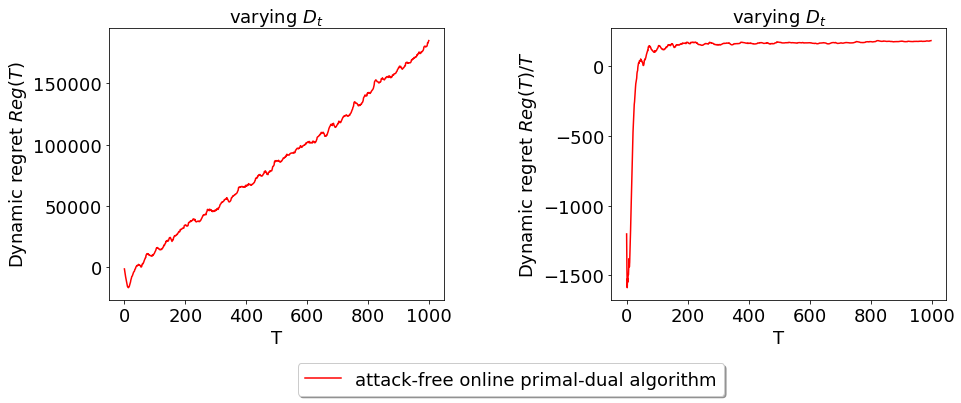

In [12]:
sub1=plt.subplot(1, 2, 1)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,dynamic_regret,color = 'red',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Dynamic regret $Reg(T)$',font2)
plt.title('varying $D_{t}$',font2) 

sub2=plt.subplot(1, 2, 2)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,dynamic_regret_T,color = 'red',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Dynamic regret $Reg(T)/T$',font2)
plt.title('varying $D_{t}$',font2) 

plt.legend(handles=[A],prop={'size':18},loc="upper center", bbox_to_anchor=[-0.3, -0.2],
           ncol=18, shadow=True, fancybox=True)

plt.subplots_adjust(wspace=0.5,hspace=0.5) 
plt.gcf().set_size_inches((15, 5))

#plt.savefig('./figures/01-figure1_dynamic_regret_attack_free_varying_D.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-figure1_dynamic_regret_attack_free_varying_D.png',format='png', bbox_inches='tight')

In [13]:
#累计的约束违反

In [14]:
sum_thermal_wind_power_station_strategy=np.loadtxt("./data/00_attack_free_sum_thermal_wind_power_station_strategy.txt")
d_power_demand=np.loadtxt("./data/d_power_demand_normal_distribution_(70,5).txt")

In [15]:
accumulative_constraint_violation=[]
accumulative_constraint_violation_T=[]
for T in range(1, 1000):
    accumulative_constraint_violation_auxiliary_variable=0
    for t in range(0, T): 
        accumulative_constraint_violation_auxiliary_variable=accumulative_constraint_violation_auxiliary_variable+(1/5)*sum_thermal_wind_power_station_strategy[t+1]-d_power_demand[t+1]
    accumulative_constraint_violation.append(abs(accumulative_constraint_violation_auxiliary_variable))
    accumulative_constraint_violation_T.append(abs(accumulative_constraint_violation_auxiliary_variable)/T)

In [16]:
accumulative_constraint_violation_T

[44.659041904000006,
 48.588688235000006,
 50.168327892,
 50.5797092695,
 50.032194744,
 49.04791595933333,
 47.940590304285706,
 45.49549802849999,
 43.62174885133332,
 43.144045732799995,
 41.817135058545446,
 39.14980935283332,
 36.986211153538456,
 34.968353485428565,
 32.37544473,
 30.157231905624997,
 28.34915307141176,
 26.580509473111107,
 24.35864754578947,
 22.710135689399998,
 21.238781018285714,
 19.784759995636364,
 18.53312815330435,
 17.551954516666665,
 16.16383537232,
 15.41803457146154,
 14.800870483111112,
 13.88697222742857,
 13.187570266758618,
 12.353555961399998,
 11.57251191316129,
 11.308445914437499,
 10.807547348363636,
 10.369911202411764,
 9.765556248285714,
 9.343348790999999,
 9.020881757675674,
 8.27881918105263,
 7.890050455282049,
 7.693554130599997,
 7.483580181951217,
 7.54574649333333,
 7.45373733693023,
 7.3108280671363595,
 7.209357536399996,
 7.067797321043474,
 7.034404601446805,
 6.973562470249997,
 7.06228550285714,
 7.0963688281999975,
 7.102

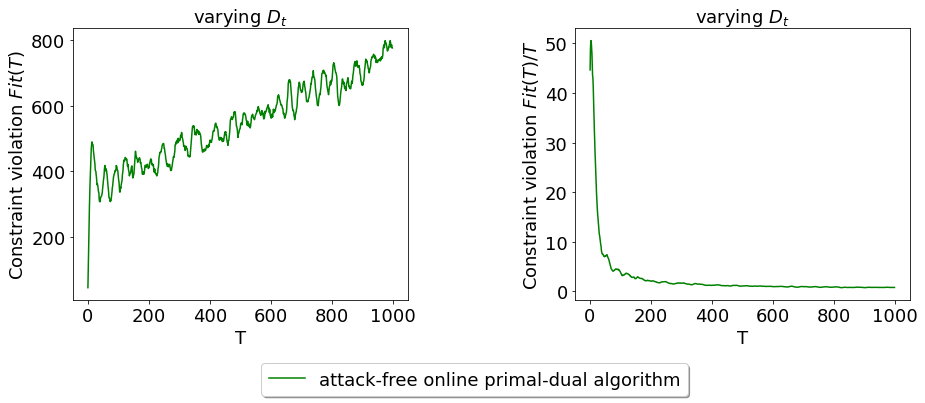

In [17]:
sub1=plt.subplot(1, 2, 1)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,accumulative_constraint_violation,color = 'green',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Constraint violation $Fit(T)$',font2)
plt.title('varying $D_{t}$',font2) 

sub2=plt.subplot(1, 2, 2)##############################################################
iteration=[]
for i in range(0,999):
    iteration.append(i)

#在同一幅图片上画3条折线
A,=plt.plot(iteration,accumulative_constraint_violation_T,color = 'green',linewidth = '1.5',label='attack-free online primal-dual algorithm')


#设置图例并且设置图例的字体及大小
font1 = {
'size'   : 18,
}
#legend = plt.legend(handles=[A],prop=font1)
 
#设置坐标刻度值的大小以及刻度值的字体
plt.tick_params(labelsize=18)
 
#设置横纵坐标的名称以及对应字体格式
font2 = {
'size'   : 18,
}
plt.xlabel('T',font2)
plt.ylabel(r'Constraint violation $Fit(T)/T$',font2)
plt.title('varying $D_{t}$',font2) 

plt.legend(handles=[A],prop={'size':18},loc="upper center", bbox_to_anchor=[-0.3, -0.2],
           ncol=18, shadow=True, fancybox=True)

plt.subplots_adjust(wspace=0.5,hspace=0.5) 
plt.gcf().set_size_inches((15, 5))


#plt.savefig('./figures/01-figure2_constraint_violation_attack_free_varying_D.pdf',format='pdf', bbox_inches='tight')
#plt.savefig('./figures/01-figure2_constraint_violation_attack_free_varying_D.png',format='png', bbox_inches='tight')